# BANK REVIEW/COMPLAINT ANALYSIS

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import re 
import string
import nltk

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

from sklearn.model_selection import StratifiedKFold

import textblob

from textblob import TextBlob
from nltk.stem import PorterStemmer
import unicodedata


In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble

In [3]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
# importing dataset
bank = pd.read_excel('BankReviews.xlsx',encode='utf-8')

In [5]:
bank.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


# Basic Exploratory Analysis

In [8]:
df = bank.copy()

In [9]:
stops = set(stopwords.words('english'))
print(stops)

set([u'all', u'just', u"don't", u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'don', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u"should've", u"haven't", u'do', u'them', u'his', u'very', u"you've", u'they', u'not', u'during', u'now', u'him', u'nor', u"wasn't", u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u"won't", u'where', u"mustn't", u"isn't", u'few', u'because', u"you'd", u'doing', u'some', u'hasn', u"hasn't", u'are', u'our', u'ourselves', u'out', u'what', u'for', u"needn't", u'below', u're', u'does', u"shouldn't", u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u"mightn't", u"doesn't", u'were', u'here', u'shouldn', u'hers', u"aren't", u'by', u'on', u'about', u'couldn', u'of', u"wouldn't", u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u"hadn't", u'mightn', u"couldn't", u'wasn', u'your', u"you're", u'from', u'her', u'their', u'aren', u"it's",

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [11]:
df['Reviews']=df["Reviews"].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))

In [12]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Reviews"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Reviews"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#lower case words count
df["count_words_lower"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words
df["mean_word_len"] = df['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of spaces
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [13]:
df.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,15,0,0,0,"{u'and': 1, u'Great': 1, u'Wyndham': 1, u'Than...",8,3,1,1,3
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,21,0,0,0,"{u'and': 1, u'helpful.': 1, u'Thank': 1, u'ser...",7,3,4,2,4
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,73,0,0,1,"{u'and': 4, u'Sincerest': 1, u'Wyndham': 3, u'...",24,10,5,8,8
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,101,0,0,1,"{u'and': 5, u'indebted': 1, u'Wyndham': 3, u'h...",30,17,8,7,11
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,53,0,0,1,"{u'and': 4, u'Wyndham': 1, u'family': 1, u'ser...",16,9,4,4,8


# Split the data into Train & Test

In [14]:
# define X and y
X = bank.Reviews
y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353L,)
(152L,)
(353L,)
(152L,)


### Tokenization

In [15]:
def tokenization(text):
    text=word_tokenize(text)
    return(text)

In [16]:
token_X_train = X_train.apply(lambda x: tokenization(x))
token_X_test = X_test.apply(lambda x: tokenization(x))

### POS Tagging

In [17]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)

In [18]:
pos_tag_X_train = token_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = token_X_test.apply(lambda x: pos_tagging(x))

### Basic Text Cleaning

In [19]:
def text_cleaning(text):
    text = text.lower()                                       # Convert text to lower case
    text = text.strip()
    text = re.sub(r' +',' ',text)                             # Replacing more than one spaces with a single space
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?$,'0-9]", "", text)  # Replacing special characters and numbers with none
    return text

In [20]:
X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

### Stop word removal

In [21]:
def stop_word_removal(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stops))   #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                         # Correct spelling corrections
    return(text)

In [22]:
X_train=stop_word_removal(X_train)
X_test=stop_word_removal(X_test)

### Lemmatization

In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
def lemmatization(text):
    text = text.apply(lambda x: " ".join(lemmatizer.lemmatize(w.decode('utf-8')) for w in x.split()))  
    return(text)


In [25]:
X_train = lemmatization(X_train)
X_test = lemmatization(X_test)

### Vectorization for Train only

In [26]:
#Train
count_vector = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=5 , max_features=800)
count_vector = count_vector.fit(X_train)
X_train_count = count_vector.transform(X_train)

In [27]:
count_vector.get_feature_names()

[u'aaron',
 u'able',
 u'absolutely',
 u'accept',
 u'accommodation',
 u'account',
 u'accurate',
 u'across',
 u'actual',
 u'adam',
 u'additional',
 u'advice',
 u'agent',
 u'agreed',
 u'all',
 u'almost',
 u'along',
 u'already',
 u'also',
 u'always',
 u'amazing',
 u'american',
 u'amount',
 u'annoyed',
 u'another',
 u'answer',
 u'answered',
 u'answering',
 u'anyone',
 u'anything',
 u'application',
 u'apply',
 u'appraisal',
 u'appraise',
 u'appreciate',
 u'appreciated',
 u'around',
 u'ask',
 u'asked',
 u'asking',
 u'assurance',
 u'attention',
 u'attorney',
 u'available',
 u'away',
 u'awesome',
 u'back',
 u'bad',
 u'balance',
 u'bank',
 u'based',
 u'beat',
 u'began',
 u'beginning',
 u'believe',
 u'beneficial',
 u'bent',
 u'best',
 u'better',
 u'beyond',
 u'big',
 u'bob',
 u'broker',
 u'business',
 u'buy',
 u'buyer',
 u'buying',
 u'ca',
 u'call',
 u'called',
 u'calling',
 u'calm',
 u'came',
 u'can',
 u'cannot',
 u'capital',
 u'card',
 u'care',
 u'case',
 u'causing',
 u'certainly',
 u'challengi

In [28]:
dtm = X_train_count.toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
df_x_train_dtm = pd.DataFrame(dtm,columns=count_vector.get_feature_names())
df_x_train_dtm.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,across,actual,adam,...,work,worked,working,would,wouldn,writing,wrong,wyndham,year,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Examining the tokens and their counts

In [30]:
# count of each token
token_count = df_x_train_dtm.sum()
token_count

aaron             16
able              34
absolutely         7
accept             5
accommodation      5
account           14
accurate           5
across             7
actual             6
adam              38
additional        11
advice             5
agent             14
agreed             6
all               11
almost            14
along             11
already           11
also              37
always            64
amazing           20
american           6
amount            20
annoyed            5
another           19
answer            23
answered          16
answering          9
anyone            46
anything          12
                ... 
veteran            7
via               16
wait               7
walk               5
want              31
wanted            14
way               35
webster            8
week              57
well              29
went              48
weren             10
whatever           5
whole             14
wife              17
willing            6
within       

In [31]:
token_count_df = pd.DataFrame({'token':token_count.index, 'count':token_count.values})
token_count_df.sort_values(by=['count'],ascending=False,inplace=True)
token_count_df.head(20)

,count,token
297,235,loan
389,176,process
563,159,would
509,150,time
245,134,home
527,130,u
410,128,read
325,112,mortgage
225,108,great
406,107,rate


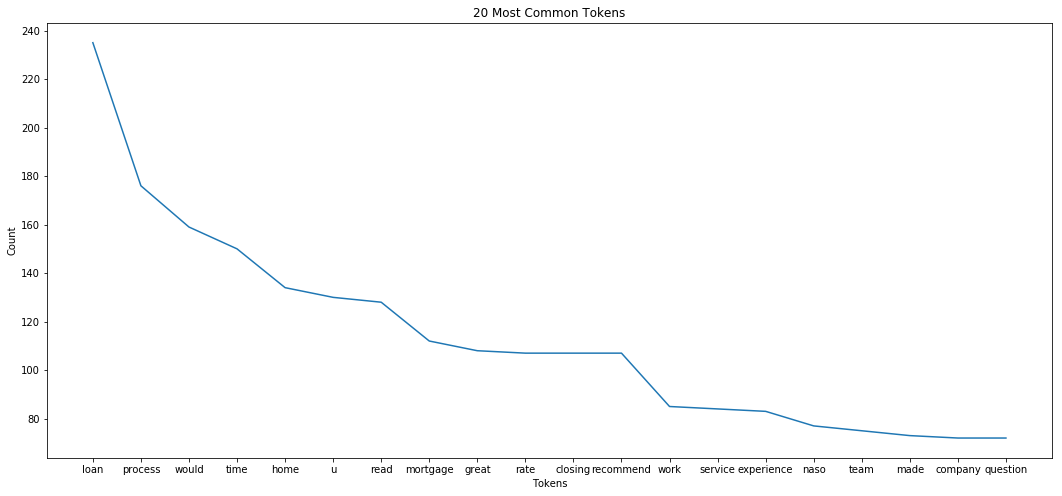

In [32]:
# 20 most common tokens
plt.figure(figsize=(18,8))
plt.plot('token','count',data=token_count_df[:20])
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('20 Most Common Tokens')
plt.show()

### Visualization of most common words through word cloud

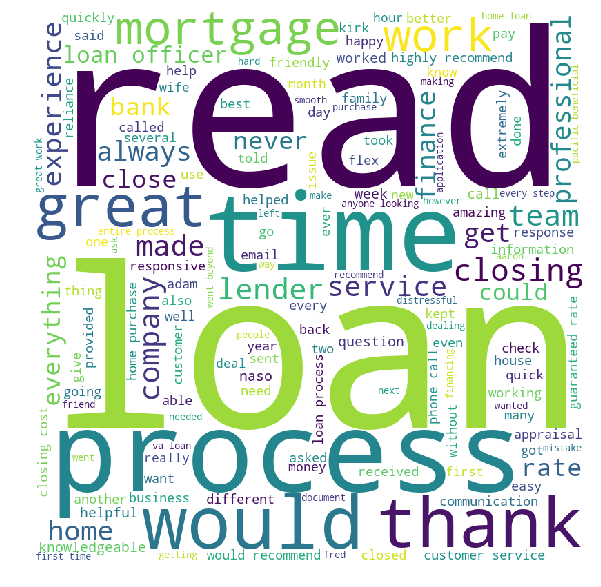

In [33]:
from wordcloud import WordCloud
words_list = []
for text in X_train:
    words_list = words_list + text.split()
whole_string = ' '.join(words_list)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(whole_string) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Topic Modeling

In [34]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(df_x_train_dtm)
topic_word = lda_model.components_ 
vocab = count_vector.get_feature_names()

In [35]:
docment_topic_df

NameError: name 'docment_topic_df' is not defined

In [ ]:
# This DataFrame represents ratio of each topic in each document
docment_topic_df= pd.DataFrame(X_topics,columns=['Topic_1','Topic_2','Topic_3','Topic_4','Topic_5','Topic_6','Topic_7','Topic_8','Topic_9','Topic_10'])
docment_topic_df['Document_Number'] = np.arange(353)
docment_topic_df.index = docment_topic_df.Document_Number
docment_topic_df = docment_topic_df.drop(['Document_Number'],axis=1)
docment_topic_df.head(10)

In [ ]:
topics_components = []
for x in range(10):
    topics_components.append(pd.Series(pd.DataFrame(topic_word,columns=vocab).iloc[0,:].sort_values(ascending = False)[:10].values,index=pd.DataFrame(topic_word,columns=vocab).iloc[x,:].sort_values(ascending = False)[:10].index.tolist()))

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
bp = PdfPages('Ten_Imp_Tokens_Of_Each_Topic')

for i in range(10):
    fig,axes = plt.subplots(figsize=(10,4))
    plt.xlabel('Token_Importance')
    plt.ylabel('Tokens')
    sns.barplot(x=topics_components[i].values,y=topics_components[i].index)
    plt.title('TOPIC '+str(i+1) )
    bp.savefig(fig)
    
bp.close()   
# Ten Important Tokens Of Each Topic

## Vectorization for both train & test 

In [ ]:
count_vector = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=5 , max_features=800)
count_vector = count_vector.fit(X_train)
X_train_count = count_vector.transform(X_train) 
X_test_count = count_vector.transform(X_test)

#### Document-Term Matrix(DTM)

In [ ]:
dtm = X_train_count.toarray()
dtm

In [ ]:
df_x_train_dtm = pd.DataFrame(dtm,columns=count_vector.get_feature_names())
df_x_train_dtm.head()

In [ ]:
df_x_test_dtm = pd.DataFrame(X_test_count.toarray(),columns=count_vector.get_feature_names())
df_x_test_dtm.head()

#### Term_Frequency-Inverse_Document_Frequency (TF-IDF)

In [ ]:
tf_idf_tranformer = TfidfTransformer()
tf_idf_tranformer = tf_idf_tranformer.fit(X_train_count)
X_train_tf_idf = tf_idf_tranformer.transform(X_train_count)
tf_idf = X_train_tf_idf.toarray()
tf_idf

In [ ]:
df_x_train_tf_idf = pd.DataFrame(tf_idf,columns=count_vector.get_feature_names())
df_x_train_tf_idf.head()

In [ ]:
df_x_test_tf_idf = pd.DataFrame(tf_idf_tranformer.transform(X_test_count).toarray(),columns=count_vector.get_feature_names())
df_x_test_tf_idf.head()

#### N-gram(bi-gram) level TF-IDF

In [ ]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
df_x_train_tf_idf_n_gram = pd.DataFrame(X_train_tfidf_ngram.toarray(),columns= tfidf_vect_ngram.get_feature_names())
df_x_train_tf_idf_n_gram.head()

In [ ]:
df_x_test_tf_idf_n_gram = pd.DataFrame(tfidf_vect_ngram.transform(X_test).toarray(),columns= tfidf_vect_ngram.get_feature_names())
df_x_test_tf_idf_n_gram.head()

## Building model using Naive Bayes

In [ ]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [ ]:
clf = MultinomialNB().fit(df_x_train_dtm,y_train)
print('dtm train accuracy', metrics.accuracy_score(clf.predict(df_x_train_dtm),y_train))
print('dtm test accuracy', metrics.accuracy_score(clf.predict(df_x_test_dtm),y_test))

clf = MultinomialNB().fit(df_x_train_tf_idf,y_train)
print('tfidf train accuracy', metrics.accuracy_score(clf.predict(df_x_train_tf_idf),y_train))
print('tfidf test accuracy', metrics.accuracy_score(clf.predict(df_x_test_tf_idf),y_test))

clf = MultinomialNB().fit(df_x_train_tf_idf_n_gram,y_train)
print('tfidf_ngram train accuracy', metrics.accuracy_score(clf.predict(df_x_train_tf_idf_n_gram),y_train))
print('tfidf_ngram test accuracy', metrics.accuracy_score(clf.predict(df_x_test_tf_idf_n_gram),y_test))

In [ ]:
# It can be observed that DTM outperforms other matrixes in terms of both train and test accuracy

## Buiding Final Model

In [ ]:
y_train.value_counts()

In [ ]:
clf = MultinomialNB().fit(df_x_train_dtm,y_train)

### Rating(Stars) Prediction

In [ ]:
y_pred_train = clf.predict(df_x_train_dtm)
y_pred_test = clf.predict(df_x_test_dtm)

In [ ]:
clf_train_pred = pd.DataFrame()
clf_train_pred['actual_rating'] = y_train
clf_train_pred['predicted_rating'] = y_pred_train
clf_test_pred = pd.DataFrame()
clf_test_pred['actual_rating'] = y_test
clf_test_pred['predicted_rating'] = y_pred_test

In [ ]:
sns.heatmap(pd.crosstab(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [ ]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']))

In [ ]:
print(metrics.classification_report(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']))

In [ ]:
print(metrics.classification_report(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']))

### Sentiment Prediction

In [ ]:
# Reviews with 5 stars can be considered as review with positive sentiement
# Reviews with 1 stars can be considered as review with negative sentiement

In [ ]:
clf_train_pred['Orignal_Sentiment'] = clf_train_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_train_pred['Predicted_Sentiment'] = clf_train_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_test_pred['Orignal_Sentiment'] = clf_test_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_test_pred['Predicted_Sentiment'] = clf_test_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')

In [ ]:
clf_train_pred.head()

In [ ]:
clf_test_pred.head()

In [ ]:
sns.heatmap(pd.crosstab(clf_train_pred['Orignal_Sentiment'], clf_train_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['Orignal_Sentiment'], clf_test_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [ ]:
print(metrics.classification_report(clf_train_pred['Orignal_Sentiment'], clf_train_pred['Predicted_Sentiment']))

In [ ]:
print(metrics.classification_report(clf_test_pred['Orignal_Sentiment'], clf_test_pred['Predicted_Sentiment']))